In [ ]:
# data drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare dataset

In [ ]:
dataset_path = "/content/drive/MyDrive/Asquire_data/Vowel_Triangle_Data/tiar_data3.tsv"

test_dataset_path = "/content/drive/MyDrive/Asquire_data/Vowel_Triangle_Data/tiar_jdata.tsv"

tiar_data = pd.read_csv(dataset_path, sep="\t")
(tiar_data).head()

,sub_id,file_id,fa1,fa2,fe1,fe2,fu1,fu2,tiar
0,4012,4012_P_Asthma_F_after_Mil_Y,596.946199,1212.857771,289.064716,1898.272980,395.617824,1007.670413,100583.458977
1,4012,4012_P_Asthma_F_after_Mil_Y,597.498348,1185.180812,303.210946,2265.648813,433.196574,1218.794565,83815.352582
2,4012,4012_P_Asthma_F_after_Mil_Y,595.564284,1189.049671,297.840068,1899.105196,383.841782,1126.627251,84459.699244
3,4012,4012_P_Asthma_F_after_Mil_Y,615.570593,1203.806335,298.698386,1964.242427,412.119398,1081.021531,96809.361717
4,4012,4012_P_Asthma_F_after_Mil_Y,613.069529,1161.182985,301.001111,2042.841685,464.751361,1176.662222,62967.711117


In [ ]:
test_tiar_data = pd.read_csv(test_dataset_path, sep="\t")

test_tiar_data

,sub_id,file_id,fa1,fa2,fe1,fe2,fu1,fu2,tiar
0,j777,jjjj0,686.631486,1286.091845,322.338633,2261.320792,376.899267,985.943403,205700.879368
1,j777,jjjj1,682.880378,1227.070172,331.247640,2188.759206,395.093396,966.735973,184151.805641
2,j777,jjjj2,693.785300,1249.589562,323.789968,2257.740501,405.785609,1096.980325,173405.931953
3,j777,jjjj3,688.533143,1213.336744,337.776385,2261.054213,442.006066,1087.629289,151191.732349
4,j777,jjjj4,691.705424,1219.661632,319.096490,2235.639758,417.468300,998.269615,180555.781124


In [ ]:
# skipped subjects : test

import os
root_fpath = "/content/drive/MyDrive/Asquire_data/Vowel_Triangle_Data/Formants/subject_wise"

def get_subject_files(folder_path) :
    sub_formants = {}
    for path, subdirs, files in os.walk(folder_path):
        for name in files:
            fpath = os.path.join(path, name)
            if ("_formantSTRP_" in name) :
                sub_id = name.split("_")[0]
                if sub_id in sub_formants.keys() :
                    sub_formants[sub_id].append(fpath) 
                else :
                    sub_formants[sub_id] = [fpath]   

    return sub_formants

subjects_formants = get_subject_files(root_fpath)
sub_id_set_all = (set(map(int, set(subjects_formants.keys()))))
sub_id_set = (set(tiar_data["sub_id"].to_list()))

print("before tiar:", len(sub_id_set_all))
print("after tiar:", len(sub_id_set))

diff = sub_id_set_all - sub_id_set
print("skipped subjects: ", diff)

before tiar: 42
after tiar: 38
skipped subjects:  {4104, 4027, 4062, 4035}


In [ ]:
# plot functions

def calc_tiar(fa1, fa2, fi1, fi2, fu1, fu2) :
    d = np.linalg.det(
        [[fa1, fa2, 1],
         [fi1, fi2, 1],
         [fu1, fu2, 1]]
         )
    return np.abs(d * 0.5)

def fplot(fa1, fa2, fi1, fi2, fu1, fu2) :
    y = np.array([fa1, fi1, fu1]) * -1
    x = np.array([fa2, fi2, fu2]) * -1

    plt.plot(x, y, 'bo')

def fplotA(fa1, fa2, fi1, fi2, fu1, fu2) :
    y = np.array([fa1 ]) * -1
    x = np.array([fa2 ]) * -1
    plt.plot(x, y, 'bo', color="blue", label="Aaa")

def fplotE(fa1, fa2, fi1, fi2, fu1, fu2) :
    y = np.array([ fi1 ]) * -1
    x = np.array([ fi2 ]) * -1

    plt.plot(x, y, 'bo', color="black", label="Eee")

def fplotU(fa1, fa2, fi1, fi2, fu1, fu2) :
    y = np.array([ fu1]) * -1
    x = np.array([ fu2]) * -1

    plt.plot(x, y, 'bo', color="red", label="Uuu")

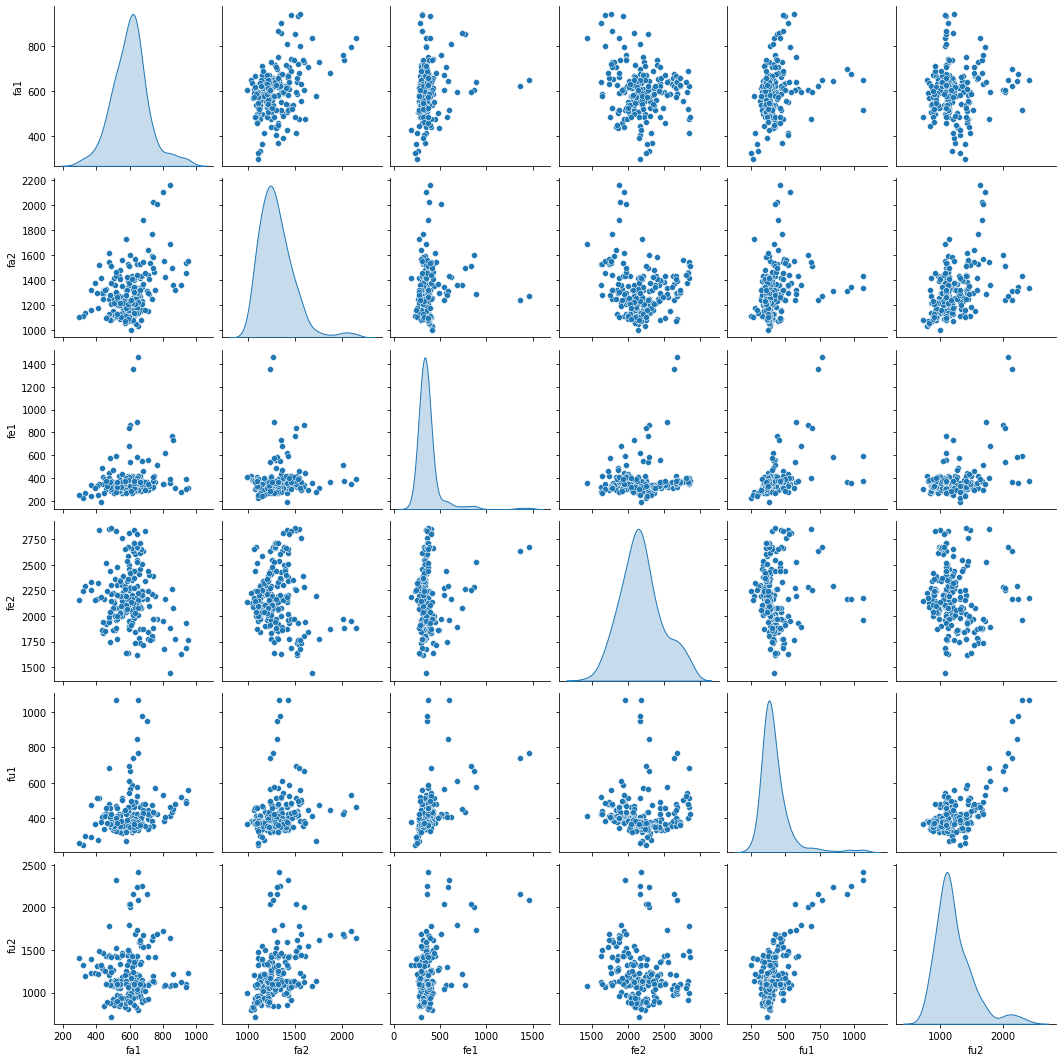

In [ ]:
sns.pairplot(tiar_data[["fa1", "fa2", "fe1", "fe2", "fu1", "fu2"]], diag_kind="kde")

In [ ]:
# get statistics

tiar_stats = tiar_data.describe()
tiar_stats.pop("sub_id")
tiar_stats = tiar_stats.transpose()
tiar_stats

,count,mean,std,min,25%,50%,75%,max
fa1,208.0,602.351326,108.436401,298.681476,536.992586,603.687052,654.015870,946.881843
fa2,208.0,1307.101352,187.534302,997.966483,1182.137217,1274.329840,1405.119127,2157.049782
fe1,208.0,369.891373,142.607229,190.736102,308.270780,342.975925,373.149556,1462.705221
fe2,208.0,2180.420985,286.496948,1437.800292,1988.190064,2159.187525,2342.079151,2858.407798
fu1,208.0,421.463126,117.497165,250.263419,359.889003,386.776239,437.532347,1066.592717
fu2,208.0,1224.622386,304.297636,718.705516,1052.955612,1134.403884,1364.286697,2419.256563
tiar,208.0,109564.497871,67875.661272,101.047661,57056.369949,109651.197060,154062.816397,326718.594463


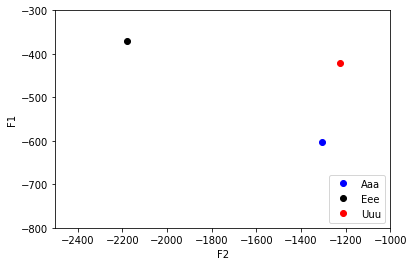

[['A' '602.3513258061271' '1307.1013516853907']
 ['I' '369.89137282308036' '2180.420985411671']
 ['U' '421.4631255781937' '1224.6223862434551']]
mean tiar:
109564.49787067466 ; 88573.13659859385


In [ ]:
# plot mean vowel triangle

[fa1_mean, fa2_mean, 
 fe1_mean, fe2_mean, 
 fu1_mean, fu2_mean, tra_mean] = tiar_stats["mean"]

m_tra = calc_tiar(fa1_mean, fa2_mean, fe1_mean, fe2_mean, fu1_mean, fu2_mean)

fplotA(fa1_mean, fa2_mean, fe1_mean, fe2_mean, fu1_mean, fu2_mean)
fplotE(fa1_mean, fa2_mean, fe1_mean, fe2_mean, fu1_mean, fu2_mean)
fplotU(fa1_mean, fa2_mean, fe1_mean, fe2_mean, fu1_mean, fu2_mean)

plt.legend(loc="lower right")
plt.xlabel("F2"); plt.ylabel("F1")
plt.xlim(-2.5e3, -1e3); plt.ylim(-800,-300) 
plt.show()

f_mean = np.array([["A", fa1_mean, fa2_mean], 
                   ["I", fe1_mean, fe2_mean], 
                   ["U", fu1_mean, fu2_mean]])

print(f_mean)
print("mean tiar:")
print(tra_mean, ";", m_tra)

# Data Format

In [ ]:
# Normalize the dataset

def norm(df, stats) :
    return (df - stats['mean']) / stats['std']

def d_norm(df, stats, col) :
    return (df * stats['std'][col]) + stats['mean'][col]

# norm_tiar_data = norm(tiar_data.drop(["file_id", "sub_id"], axis=1), tiar_stats)

# sub_id_frame = tiar_data[["sub_id"]]
# norm_tiar_data = sub_id_frame.join(norm_tiar_data)


In [ ]:
# individual subject frame list and make folds

def get_indv_sub_df(sub_ids) :
    _sub_frames = []
    for id in sub_ids :
        __sub_frame = tiar_data.loc[tiar_data['sub_id'] == id]
        _sub_frames.append(__sub_frame)
    return _sub_frames

def get_n_folds(n, dfs) :
    _n = len(dfs) // n
    _folds = list([dfs[i:i + _n] for i in range(0, len(dfs), _n)])
    # distribute
    if len(dfs) % _n != 0 :
        __rc = _folds.pop()
        for i, r in enumerate(__rc) :
            _folds[i].append(r)
    return _folds

In [ ]:
# create folds : non overlapping subjects

n_folds = 5

sub_ids = set(tiar_data["sub_id"].to_list())

sub_dfs = get_indv_sub_df(sub_ids)

sub_folds = get_n_folds(n_folds, sub_dfs)

for c in sub_folds : print(len(c), "subjects")

8 subjects
8 subjects
8 subjects
7 subjects
7 subjects


In [ ]:
# make test-train sets from folds

def get_training_sets(folds):
    _training_sets = {}
    for i in range(len(folds)) :
        __f_train = folds.copy()
        f_test = __f_train.pop(i)

        __f_train = [sub for f in __f_train for sub in f]

        __train_df = pd.concat(__f_train)
        __test_df = pd.concat(f_test)


        __l_train = (len(pd.concat(__f_train)["sub_id"].to_list()))
        __l_test = (len(pd.concat(f_test)["sub_id"].to_list()))
        __stat = __l_test / (__l_test + __l_train)

        print("set", i + 1)
        print("train:", __l_train, "; test:", __l_test, "datapoints")
        print("train data %:", __stat, end="\n\n")

        _training_sets[f"set_{i}"] = { "train": __train_df, "test": __test_df, "stat": __stat }
    
    return _training_sets


In [ ]:
# sets for training and testing

training_sets = get_training_sets(sub_folds)

set 1
train: 170 ; test: 38 datapoints
train data %: 0.18269230769230768

set 2
train: 159 ; test: 49 datapoints
train data %: 0.23557692307692307

set 3
train: 158 ; test: 50 datapoints
train data %: 0.2403846153846154

set 4
train: 171 ; test: 37 datapoints
train data %: 0.1778846153846154

set 5
train: 174 ; test: 34 datapoints
train data %: 0.16346153846153846



# Training

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
print(tf.__version__)

2.7.0


In [ ]:
dset = "set_0"
train_df = training_sets[dset]["train"].drop(["sub_id", "file_id"], 1)
test_df = training_sets[dset]["test"].drop(["sub_id", "file_id"], 1)

# normalize train data

train_stats = train_df.describe().transpose()

nor_train_df = norm(train_df, train_stats)

train_data = shuffle(nor_train_df).values # shuffle
X_train = train_data[:, 0:-1] # 6 formants
Y_train = train_data[:, -1] # tiar value

test_data = norm(test_df, train_stats).values
X_test = test_data[:, 0:-1]
Y_test = test_data[:, -1]


In [ ]:
# my test data set
test_tiar_data = pd.read_csv(test_dataset_path, sep="\t")



In [ ]:
# build model

def build_model(l1, l2) :
    l = [ layers.Dense(l1, tf.nn.relu, True, "normal", input_shape=[6]), 
         layers.Dense(l1, tf.nn.relu, True, "normal"), 
         layers.Dense(1)] 

    model = keras.Sequential(l)

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(
        loss="mse",
        optimizer=optimizer,
        metrics=["mae", "mse"]
    )

    return model


In [ ]:
example_batch = X_train[:10]
model = build_model(6, 12)
example_results = model.predict(example_batch)
example_results

array([[0.00273797],
       [0.00255886],
       [0.00382254],
       [0.00361241],
       [0.00800566],
       [0.01108605],
       [0.00144554],
       [0.0010162 ],
       [0.00235757],
       [0.00092095]], dtype=float32)

In [ ]:
# training

class PrintDot(keras.callbacks.Callback) :
    def on_epoch_end(self, epoch, logs) :
        if epoch % 100 == 0: print("")
        print(".", end="")

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=12)

EPOCHS = 1000

model = build_model(12, 8)
model.summary()

history = model.fit(
    X_train, Y_train,
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[early_stop, PrintDot()]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                84        
                                                                 
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
....................................................................................................
..............................................

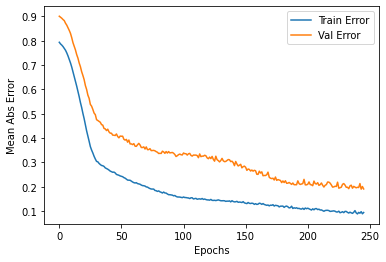

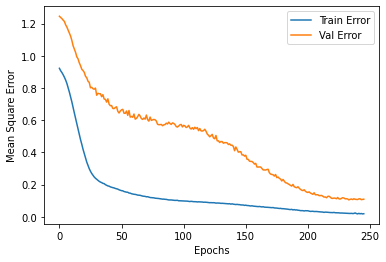

In [ ]:
def plot_history(history) :
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()

    plt.xlabel("Epochs")
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist["mae"], label="Train Error")
    plt.plot(hist['epoch'], hist["val_mae"], label="Val Error")
    plt.legend() 
    # plt.ylim([0,0.2])

    plt.figure()

    plt.xlabel("Epochs")
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist["mse"], label="Train Error")
    plt.plot(hist['epoch'], hist["val_mse"], label="Val Error")
    plt.legend()
    # plt.ylim([0,0.2])

    plt.show()

plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(X_test, Y_test, verbose=0)

print("Test:", loss, mae, mse)

Test: 0.10397118330001831 0.19989728927612305 0.10397118330001831


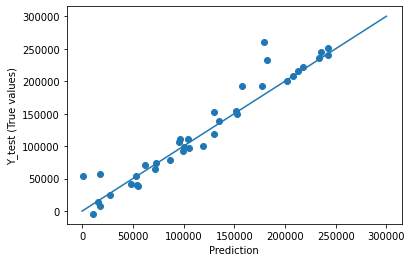

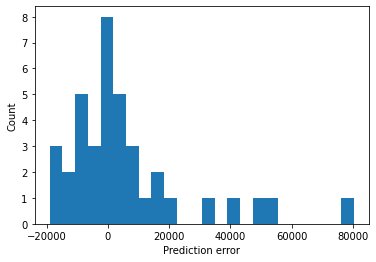

In [ ]:
# plotting results

# predict!
nor_test_pred = model.predict(X_test).flatten()

# de-normalize with the test stats
test_pred = d_norm(nor_test_pred, train_stats, "tiar")
true_tiar = d_norm(Y_test, train_stats, "tiar")

def plot_res(test_data, test_pred) :
    plt.figure()
    plt.xlabel("Prediction")
    plt.ylabel('Y_test (True values)')
    plt.scatter(test_data, test_pred)
    plt.plot([0, 300e3], [0, 300e3])

    error = test_pred - test_data

    plt.figure()
    plt.xlabel("Prediction error")
    plt.ylabel("Count")
    plt.hist(error, bins=24)
    # plt.xlim([-.5, .5])

    plt.show()



plot_res(true_tiar, test_pred)

# Training folds

In [ ]:
# callbacks

def build_model(l1, l2, l3) :
    l = [ layers.Dense(l1, tf.nn.relu, True, "normal", input_shape=[6]), 
         layers.Dense(l2, tf.nn.relu, True, "normal"), 
        #  layers.Dense(l3, tf.nn.relu, True, "normal"), 
         layers.Dense(1)] 

    model = keras.Sequential(l)

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(
        loss="mse",
        optimizer=optimizer,
        metrics=["mae", "mse"]
    )

    return model

class PrintDot(keras.callbacks.Callback) :
    def on_epoch_end(self, epoch, logs) :
        if epoch % 100 == 0: print("")
        print(".", end="")

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=12)

EPOCHS = 1000

def fit_model(X, Y) :
    # build model
    model = build_model(12, 6, 3)

    # model fit
    history = model.fit(
        X, Y,
        epochs=EPOCHS, validation_split=0.2, verbose=0,
        callbacks=[early_stop, PrintDot()]
    )

    return [model, history]

In [ ]:
size = 1

def plot_history(history, ax, si) :
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    # ax[si, 0].xlabel("Epochs")
    # ax[si, 0].ylabel('Mean Abs Error')
    ax[si, 0].plot(hist['epoch'], hist["mae"], label="Train Error", linewidth=size)
    ax[si, 0].plot(hist['epoch'], hist["val_mae"], label="Val Error", linewidth=size)
    ax[si, 0].legend() 
    # plt.ylim([0,0.2])

    # ax[si, 1].xlabel("Epochs")
    # ax[si, 1].ylabel('Mean Square Error')
    ax[si, 1].plot(hist['epoch'], hist["mse"], label="Train Error", linewidth=size)
    ax[si, 1].plot(hist['epoch'], hist["val_mse"], label="Val Error", linewidth=size)
    ax[si, 1].legend()
    # plt.ylim([0,0.2])

def plot_res(test_data, test_pred, ax, si) :
    # ax[si, 2].xlabel("Prediction")
    # ax[si, 2].ylabel('Y_test (True values)')
    ax[si, 2].plot([0, 300e3], [0, 300e3], color="black", linewidth=size/2)
    ax[si, 2].scatter(test_data, test_pred, s=size)

    error = test_pred - test_data

    # ax[si, 3].xlabel("Prediction error")
    # ax[si, 3].ylabel("Count")
    ax[si, 3].hist(error, bins=24)
    # plt.xlim([-.5, .5])

def plot_resj(test_data, test_pred, ax, si) :
    # ax[si, 4].xlabel("Prediction")
    # ax[si, 4].ylabel('Y_test (True values)')
    ax[si, 4].plot([0, 300e3], [0, 300e3], color="black", linewidth=size/2)
    ax[si, 4].scatter(test_data, test_pred, s=size)

    error = test_pred - test_data

    # ax[si, 5].xlabel("Prediction error")
    # ax[si, 5].ylabel("Count")
    ax[si, 5].hist(error, bins=24)




Training set_0


....................................................................................................
...............................................

Training set_1


....................................................................................................
....................................................................................................
....................................................................................................
.................

Training set_2


....................................................................................................


Training set_3


....................................................................................................


Training set_4


....................................................................................................
...

<Figure size 2400x1600 with 0 Axes>

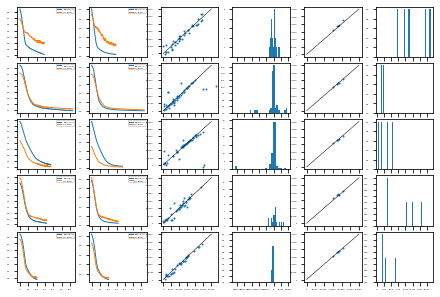

In [ ]:
# loop through folds

# model = build_model(16, 6)
# model.summary()

def eval(data, ax, si, permut=False) :

    # prepare data
    if (not permut) :
        _train_df = data["train"].drop(["sub_id", "file_id"], 1)
        _test_df = data["test"].drop(["sub_id", "file_id"], 1)
    else :
        _train_df = data["train"].drop(["sub_id"], 1)
        _test_df = data["test"].drop(["sub_id"], 1)

    ## normalize train data

    _trn_stats = _train_df.describe().transpose()

    ### train data
    _nor_train_df = norm(_train_df, _trn_stats)
    _train_data = shuffle(_nor_train_df).values # shuffle
    _X_train = _train_data[:, 0:-1] # 6 formants
    _Y_train = _train_data[:, -1]   # 1 tiar

    ### test data
    _nor_test_df = norm(_test_df.drop("tiar", 1), _trn_stats.drop("tiar"))
    _X_test = _nor_test_df.values # 6 formants
    _Y_test = _test_df["tiar"].values   # 1 tiar

    # model fit
    _model, _history = fit_model(_X_train, _Y_train)

    # predict!
    _nor_test_pred = _model.predict(_X_test).flatten()

    # de-normalize with the test stats
    _test_pred = d_norm(_nor_test_pred, _trn_stats, "tiar")

    # show plots
    plot_history(_history, ax, si)
    plot_res(_Y_test, _test_pred, ax, si)


    # test with j data
    _X_testj = norm(test_tiar_data.drop(["sub_id", "file_id", "tiar"], 1), _trn_stats.drop("tiar")).values
    _Y_testj = test_tiar_data["tiar"].values

    _nor_test_predj = _model.predict(_X_testj).flatten()
    _test_predj = d_norm(_nor_test_predj, _trn_stats, "tiar")

    plot_resj(_Y_testj, _test_predj, ax, si)

    return _model


# eval for all folds

SMALL_SIZE = 2
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

plt.figure(dpi=400)
fig, ax = plt.subplots(5, 6, sharex="col")
fig.tight_layout()
models = []
for si, s in enumerate(training_sets.keys()) :

    print ("\n\nTraining", s, end="\n\n")

    dataset = training_sets[s]

    model = eval(dataset, ax, si)

    models.append(model)

    # break

plt.show()
plot_path = f"/content/drive/MyDrive/Asquire_data/Vowel_Triangle_Data/res_plot{7}.png"

fig.savefig(plot_path, dpi=600)



In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 12)                84        
                                                                 
 dense_19 (Dense)            (None, 6)                 78        
                                                                 
 dense_20 (Dense)            (None, 1)                 7         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


# Permutation of subject data points

In [ ]:
import itertools

In [ ]:
sub_dfs[0]

,sub_id,file_id,fa1,fa2,fe1,fe2,fu1,fu2,tiar
188,4224,4224_C_Na_F_Na_Na_Y,577.577722,1320.651543,291.543048,2059.939293,321.620574,1247.729300,105042.137127
189,4224,4224_C_Na_F_Na_Na_Y,582.288488,1321.686197,275.487967,2070.737701,389.708019,1323.397014,71863.905315
190,4224,4224_C_Na_F_Na_Na_Y,517.026022,1303.610461,273.862236,1879.708311,400.478022,1132.765123,54343.225591
191,4224,4224_C_Na_F_Na_Na_Y,576.569188,1280.165556,268.031855,1641.154747,426.692965,1099.621834,54904.087552
192,4224,4224_C_Na_F_Na_Na_Y,604.800181,1242.362050,284.750090,1915.832660,497.292726,1168.829135,47968.663503


In [ ]:
# test : ignore
sub_id,	file_id,	fa1,	fa2,	fe1,	fe2,	fu1,	fu2,	tiar = sub_dfs[0].transpose().values


lists1 = [fa1, fe1, fu1]
lists2 = [fa2, fe2, fu2]

df1 = pd.DataFrame(list(itertools.product(*lists1)), columns=['fa1', 'fe1', 'fu1'])
df2 = pd.DataFrame(list(itertools.product(*lists2)), columns=['fa2', 'fe2', 'fu2'])

df = df1.join(df2)
df["sub_id"] = sub_id[0]

df = df[["sub_id","fa1","fa2" ,"fe1","fe2" ,"fu1","fu2"]]

fa1_lst,	fa2_lst,	fe1_lst,	fe2_lst,	fu1_lst,	fu2_lst = df[["fa1","fa2" ,"fe1","fe2" ,"fu1","fu2"]].transpose().values

tra_lst = []
for i in range(len(fa1_lst)) :
    
    tra = calc_tiar(fa1_lst[i],	fa2_lst[i],	fe1_lst[i],	fe2_lst[i],	fu1_lst[i],	fu2_lst[i])

    tra_lst.append(tra)

df["tiar"] = pd.DataFrame(tra_lst)

# print(df[["fa1","fa2"]].transpose().values)
# print(len(fa1_lst))

print(df)

     sub_id         fa1          fa2  ...         fu1          fu2           tiar
0      4224  577.577722  1320.651543  ...  321.620574  1247.729300  105042.137127
1      4224  577.577722  1320.651543  ...  389.708019  1323.397014   69052.235160
2      4224  577.577722  1320.651543  ...  400.478022  1132.765123   92334.834938
3      4224  577.577722  1320.651543  ...  426.692965  1099.621834   87384.706792
4      4224  577.577722  1320.651543  ...  497.292726  1168.829135   51390.093509
..      ...         ...          ...  ...         ...          ...            ...
120    4224  604.800181  1242.362050  ...  321.620574  1247.729300   94497.676797
121    4224  604.800181  1242.362050  ...  389.708019  1323.397014   59461.500902
122    4224  604.800181  1242.362050  ...  400.478022  1132.765123   86340.737636
123    4224  604.800181  1242.362050  ...  426.692965  1099.621834   82816.997154
124    4224  604.800181  1242.362050  ...  497.292726  1168.829135   47968.663503

[125 rows x 8 c

In [ ]:
# permut data points of individual subjects

def get_permut_sub_data_pts(sub_df_lst) :
    _sub_dfs_permut = []

    for __sub_df in sub_df_lst :

        [__sub_id, __file_id, 
         __fa1, __fa2, 
         __fe1, __fe2, 
         __fu1, __fu2, tiar] = __sub_df.transpose().values

        __f1 = [__fa1, __fe1, __fu1]
        __f2 = [__fa2, __fe2, __fu2]

        __df1 = pd.DataFrame(list(itertools.product(*__f1)), 
                        columns=['fa1', 'fe1', 'fu1'])
        __df2 = pd.DataFrame(list(itertools.product(*__f2)), 
                        columns=['fa2', 'fe2', 'fu2'])

        __df = __df1.join(__df2)
        __df["sub_id"] = __sub_id[0]
        __df = __df[["sub_id", "fa1", "fa2" , "fe1", "fe2", "fu1", "fu2"]]

        [__ls_fa1, __ls_fa2, 
        __ls_fe1, __ls_fe2, 
        __ls_fu1, __ls_fu2] = __df[["fa1", "fa2" , 
                                "fe1", "fe2", 
                                "fu1", "fu2"]].transpose().values

        __ls_tra = []
        for i in range(len(__ls_fa1)) :
        
            ___tra = calc_tiar(__ls_fa1[i],	__ls_fa2[i],	
                            __ls_fe1[i],	__ls_fe2[i],	
                            __ls_fu1[i],	__ls_fu2[i])
            __ls_tra.append(___tra)

        __df_tra = pd.DataFrame({"tiar":__ls_tra})

        __df = __df.join(__df_tra)

        _sub_dfs_permut.append(__df)

    return _sub_dfs_permut

In [ ]:
# list of subjects with formants data frame

sub_dfs_permut = get_permut_sub_data_pts(sub_dfs)

In [ ]:
sub_dfs_permut

[     sub_id         fa1          fa2  ...         fu1          fu2           tiar
 0      4224  577.577722  1320.651543  ...  321.620574  1247.729300  105042.137127
 1      4224  577.577722  1320.651543  ...  389.708019  1323.397014   69052.235160
 2      4224  577.577722  1320.651543  ...  400.478022  1132.765123   92334.834938
 3      4224  577.577722  1320.651543  ...  426.692965  1099.621834   87384.706792
 4      4224  577.577722  1320.651543  ...  497.292726  1168.829135   51390.093509
 ..      ...         ...          ...  ...         ...          ...            ...
 120    4224  604.800181  1242.362050  ...  321.620574  1247.729300   94497.676797
 121    4224  604.800181  1242.362050  ...  389.708019  1323.397014   59461.500902
 122    4224  604.800181  1242.362050  ...  400.478022  1132.765123   86340.737636
 123    4224  604.800181  1242.362050  ...  426.692965  1099.621834   82816.997154
 124    4224  604.800181  1242.362050  ...  497.292726  1168.829135   47968.663503
 
 [

In [ ]:
n_folds_permut = 7

sub_folds_permut = get_n_folds(n_folds_permut, sub_dfs_permut)


for c in sub_folds_permut : print(len(c), "subjects")

6 subjects
6 subjects
6 subjects
5 subjects
5 subjects
5 subjects
5 subjects


In [ ]:
# sets for training and testing

training_sets_permut = get_training_sets(sub_folds_permut)

set 1
train: 8136 ; test: 628 datapoints
train data %: 0.07165677772706527

set 2
train: 8014 ; test: 750 datapoints
train data %: 0.08557736193518942

set 3
train: 5450 ; test: 3314 datapoints
train data %: 0.3781378366042903

set 4
train: 8139 ; test: 625 datapoints
train data %: 0.07131446827932451

set 5
train: 7264 ; test: 1500 datapoints
train data %: 0.17115472387037883

set 6
train: 7381 ; test: 1383 datapoints
train data %: 0.15780465540848929

set 7
train: 8200 ; test: 564 datapoints
train data %: 0.06435417617526244





Training set_0


...............................................................................................

Training set_1


....................................................................................

Training set_2


....................................................................................................
....................................................................................................
...

Training set_3


....................................................................................................
...................................................................

Training set_4


....................................................................................................
.......................................

Training set_5


....................................................................................................
...........

Training set_6


...............................................................

<Figure size 3600x2400 with 0 Axes>

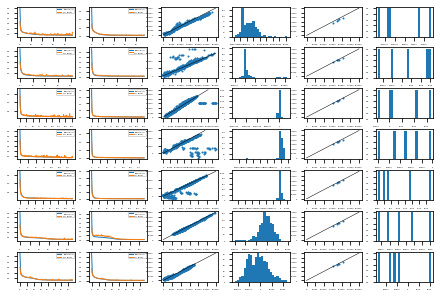

In [ ]:
plt.figure(dpi=600)
px = len(training_sets_permut.keys())
fig, ax = plt.subplots(px, 6)
fig.tight_layout()


models_permut = []
for si, s in enumerate(training_sets_permut.keys()) :

    print ("\n\nTraining", s, end="\n\n")

    dataset = training_sets_permut[s]

    model = eval(dataset, ax, si, permut=True)

    models_permut.append(model)

    # break

plt.show()
plot_path = f"/content/drive/MyDrive/Asquire_data/Vowel_Triangle_Data/res_plot_permut{5}.png"

fig.savefig(plot_path, dpi=600)
